# Balancing

## Imports

In [14]:
import sys
import os

sys.path.append(os.path.abspath('../scripts'))

import torch
from torch.utils.data import Subset
from collections import Counter
from scripts.emotions import emotions
import matplotlib.pyplot as plt
import seaborn as sns

## Vars

In [23]:
train_dataset_path = '../.data/output/train_dataset.pth'
balanced_dataset_output_path = '../.data/output/balanced_train_dataset.pth'

## Load datasets

In [3]:
train_dataset = torch.load(train_dataset_path)

C:\Users\zouff\AppData\Local\Temp\ipykernel_29276\76755992.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load(train_dataset_path)


## Plotting imbalances
Below we will visualise the labels data to have an idea of the class balances and if they need to be changed.

In [4]:
labels = [label for _, label in train_dataset]

### Plot

The inbalance is clear from the plot below there are a lot more samples from happy than the other classes, this might lead to a model that is biased towards happy.

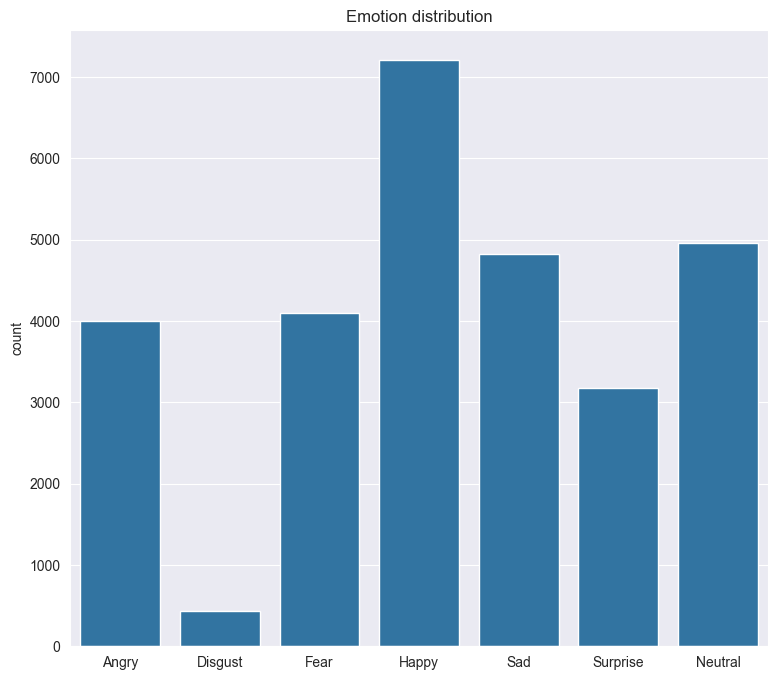

In [5]:
plt.figure(figsize=(9, 8))
sns.countplot(x=labels)
_ = plt.title('Emotion distribution')
_ = plt.xticks(ticks=range(7), labels=[emotions[i] for i in range(7)])
plt.show()

## Create balanced dataset

This first step analyzes the distribution of faces in the training data. By counting how many images we have for each person, we identify the class with the most examples. This maximum count will be the target size for all classes after balancing, ensuring no single face dominates the training process.

In [18]:
class_counts = Counter([label for _, label in train_dataset])
max_samples = max(class_counts.values())

### Balanced indices

Here's the core logic for balancing. For each face, we find the indices of all its images in the original dataset. Then, we oversample by repeating these indices until we reach the max_samples count

In [19]:
balanced_indices = []
for class_label in class_counts.keys():
    # Get all indices of the current class
    class_indices = [i for i, (_, label) in enumerate(train_dataset) if label == class_label]
    
    # Oversample the class
    oversampled_indices = class_indices * (max_samples // len(class_indices)) + \
                          class_indices[:max_samples % len(class_indices)]
    balanced_indices.extend(oversampled_indices)

### Create new balanced set
Finally, we create a new dataset containing only the samples at the indices we generated. Using Subset is crucial for efficiency

In [20]:
balanced_dataset = Subset(train_dataset, balanced_indices)

## Plot the new balanced dataset

In [21]:
labels = [label for _, label in balanced_dataset]

### Plot
In this plot we can obviously see that the classes are now balanced. This will help the model to learn the features of each class better.

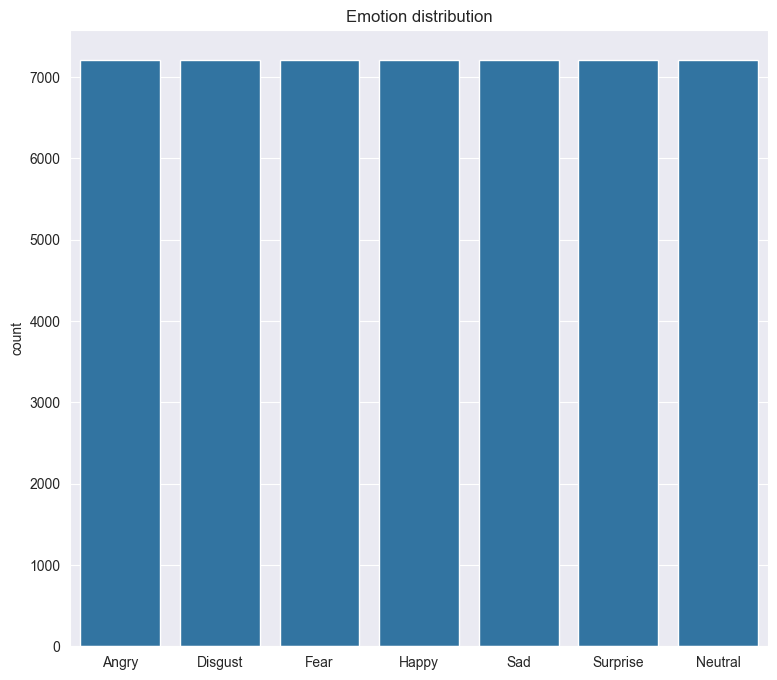

In [22]:
plt.figure(figsize=(9, 8))
sns.countplot(x=labels)
_ = plt.title('Emotion distribution')
_ = plt.xticks(ticks=range(7), labels=[emotions[i] for i in range(7)])
plt.show()

## Saving

In [24]:
torch.save(balanced_dataset, balanced_dataset_output_path)